# HEAVY TRAFFIC INDICATORS ON I-94

 In this project we will be analyzing the [Metro_Interstate_Traffic_Volume.csv](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) and are going to try and answer some questions like what are some major indicators for the heavy traffic on I-94 which is east–west Interstate Highway connecting the Great Lakes and northern Great Plains regions of the United States.

In [1]:
# Importing some useful libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Reading in the csv
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
# Getting info about the dataset
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
traffic.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB



It seems that all the values in the dataframe are non-null. There are a total of 8 columns.
The official documentation also say that the data was station that is located midway between Minneapolis and Saint Paul.
It is also important to note that the data recorded is only for westbound traffic and should not be generalized for the whole I-94 highway. You can read the official documentation [here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

### We are now going to start with visual analysis

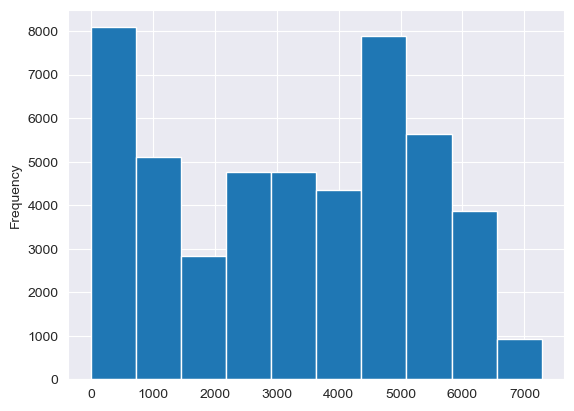

In [6]:
traffic['traffic_volume'].plot.hist()
plt.show()

In [7]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00 there traffic ranged between (0, 7280). At least one day when the traffic recorded was 0 which might suggest the I-94 might be under construction and hence no traffic recorded, or it could mean that the traffic was diverted just before crossing the recording station. The above values suggest that 25% of the time there was only 1193 traffic and another 25% of the time had a volume of 4933 which is more that 4 times the earlier one. This difference could be because of nighttime and daytime traffic.

## DAYTIME VS NIGHTTIME

We have to first divide out dataset into sets now one that contains info about the daytime and other about the nighttime.
We will take 7:00 A.M. to 7:00 P.M. as daytime and 7:00 P.M. to 7:00 A.M. as nighttime.


In [8]:
traffic['date_time']= pd.to_datetime(traffic['date_time'])
traffic['date_time'].head()

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
Name: date_time, dtype: datetime64[ns]

In [10]:
nighttime = traffic[(traffic['date_time'].dt.hour >= 19)  | (traffic['date_time'].dt.hour < 7)]
nighttime

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


This project is on hold and is waiting for an answer on stackoverflow
The question has been answered and above we are using bitwise or and not logical or because we are comparing two boolean lists and not one variable hence we need to use bitwise to compare each element in the list.
The question is [here](https://stackoverflow.com/questions/74783261/condition-for-determining-day-or-night-when-using-datetime-module-in-python)

In [12]:
daytime = traffic[(traffic['date_time'].dt.hour < 19)  & (traffic['date_time'].dt.hour >= 7)]
daytime

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132


### Now we are going to plot the traffic volume side by side on a histogram

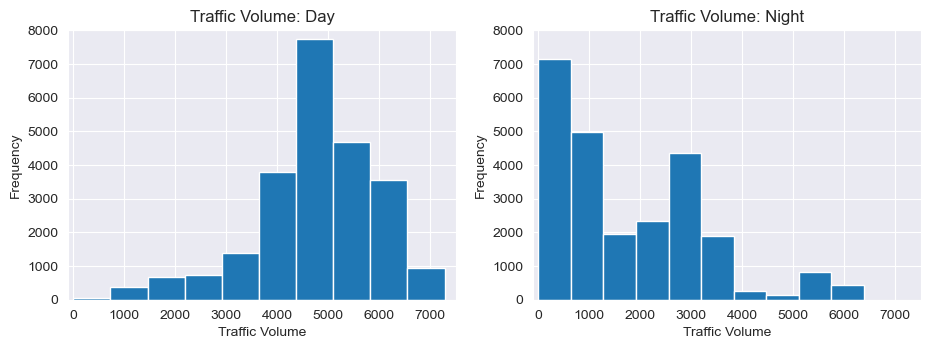

In [14]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(daytime['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(nighttime['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()